In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
path_shapefile="cont-aad-caop2017/Cont_AAD_CAOP2017.shp"

# Read in Portugal shapefile
portugal = gpd.read_file(path_shapefile)

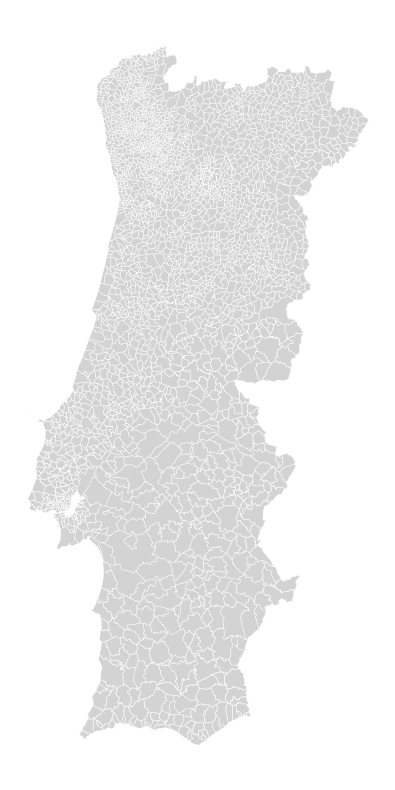

In [4]:
# Plot Portugal
fig, ax = plt.subplots(figsize=(10,10))
portugal.plot(ax=ax, 
              color='lightgrey', 
              edgecolor='white',
              linewidth=0.3)

ax.set(xticks=[], yticks=[])
plt.axis('off')
plt.show()

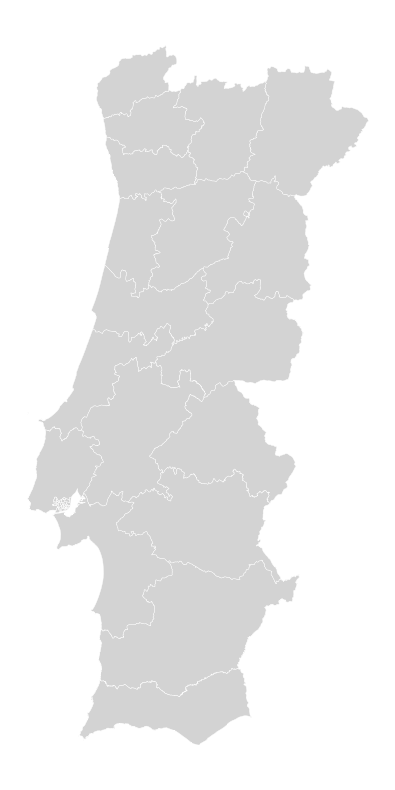

In [22]:
# Subset the Lisbon municipality
# Subset the Lisbon municipality
lisbon = portugal[portugal['Concelho'].isin(['LISBOA', 'AMADORA'])]

# Dissolve the remaining municipalities by district
districts = portugal[~portugal['Concelho'].isin(['LISBOA', 'AMADORA'])].dissolve(by='Distrito')

# Merge Lisbon back into the districts GeoDataFrame
districts = gpd.GeoDataFrame(pd.concat([districts, lisbon]))

# Plot the districts with white outline
fig, ax = plt.subplots(figsize=(10,10))
districts.plot(ax=ax, 
               facecolor='lightgrey', 
               edgecolor='white',
               linewidth=0.3)

ax.set(xticks=[], yticks=[])
plt.axis('off')
plt.show()

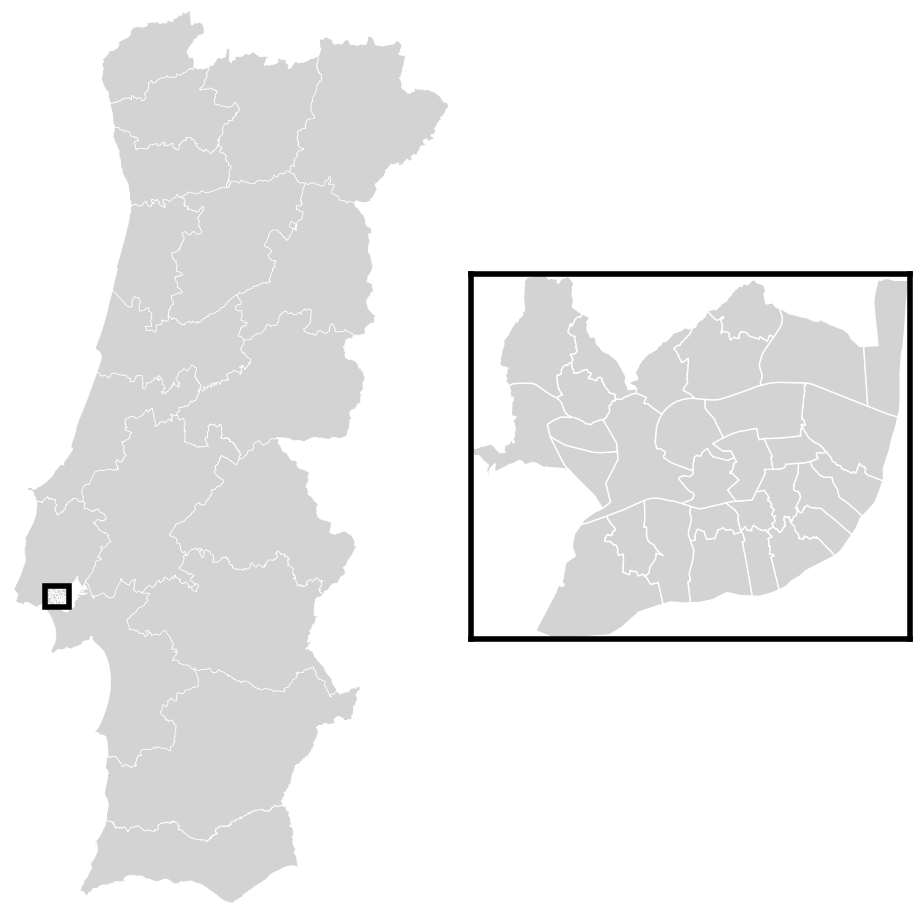

In [23]:
from matplotlib.patches import Rectangle

# Set up the figure and axes
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))

# Plot the districts with white outline and Lisbon with red border
districts.plot(ax=ax1, 
               facecolor='lightgrey', 
               edgecolor='white',
               linewidth=0.5)

# Add a rectangular patch around Lisbon with red edgecolor
ax1.add_patch(Rectangle((lisbon.total_bounds[0], lisbon.total_bounds[1]),
                         lisbon.total_bounds[2] - lisbon.total_bounds[0],
                         lisbon.total_bounds[3] - lisbon.total_bounds[1],
                         fill=False,
                         edgecolor='black',
                         linewidth=4,
                         clip_on=False))
ax1.axis('off')

# Plot Lisbon
lisbon.plot(ax=ax2, 
            facecolor='lightgrey', 
            edgecolor='white',
            linewidth=1)

# Set the axis limits
ax1.set_xlim(portugal.total_bounds[0]-2000, portugal.total_bounds[2])
ax1.set_ylim(portugal.total_bounds[1], portugal.total_bounds[3])
ax2.set_xlim(lisbon.total_bounds[0], lisbon.total_bounds[2])
ax2.set_ylim(lisbon.total_bounds[1], lisbon.total_bounds[3])

# Set the titles and axis labels
#ax1.set_title(label='Portugal', fontsize=20)
ax2.set(xticks=[], yticks=[])
#ax2.set_title(label='Lisbon Municipes', fontsize=20)

# Set the color and width of the spines
for spine in ax2.spines.values():
    spine.set_color('black')
    spine.set_linewidth(4)

# Adjust the spacing between subplots
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.5, top=0.95, wspace=0.05)

plt.savefig('cute.pdf')

In [24]:
np.unique(lisbon.Freguesia) # Alfragide, Olivais, Beato, Alvalade : Entrecampos, Águas-Livres : Reboleira, 

array(['Ajuda', 'Alcântara', 'Alfragide', 'Alvalade', 'Areeiro',
       'Arroios', 'Avenidas Novas', 'Beato', 'Belém', 'Benfica',
       'Campo de Ourique', 'Campolide', 'Carnide', 'Encosta do Sol',
       'Estrela', 'Falagueira-Venda Nova', 'Lumiar', 'Marvila',
       'Mina de Água', 'Misericórdia', 'Olivais', 'Parque das Nações',
       'Penha de França', 'Santa Clara', 'Santa Maria Maior',
       'Santo António', 'São Domingos de Benfica', 'São Vicente',
       'Venteira', 'Águas Livres'], dtype=object)

In [25]:
# Create a boolean mask indicating which rows should have a red border
mask = lisbon.Freguesia.isin(['Alfragide', 'Olivais', 'Beato', 'Alvalade', 'Águas Livres'])

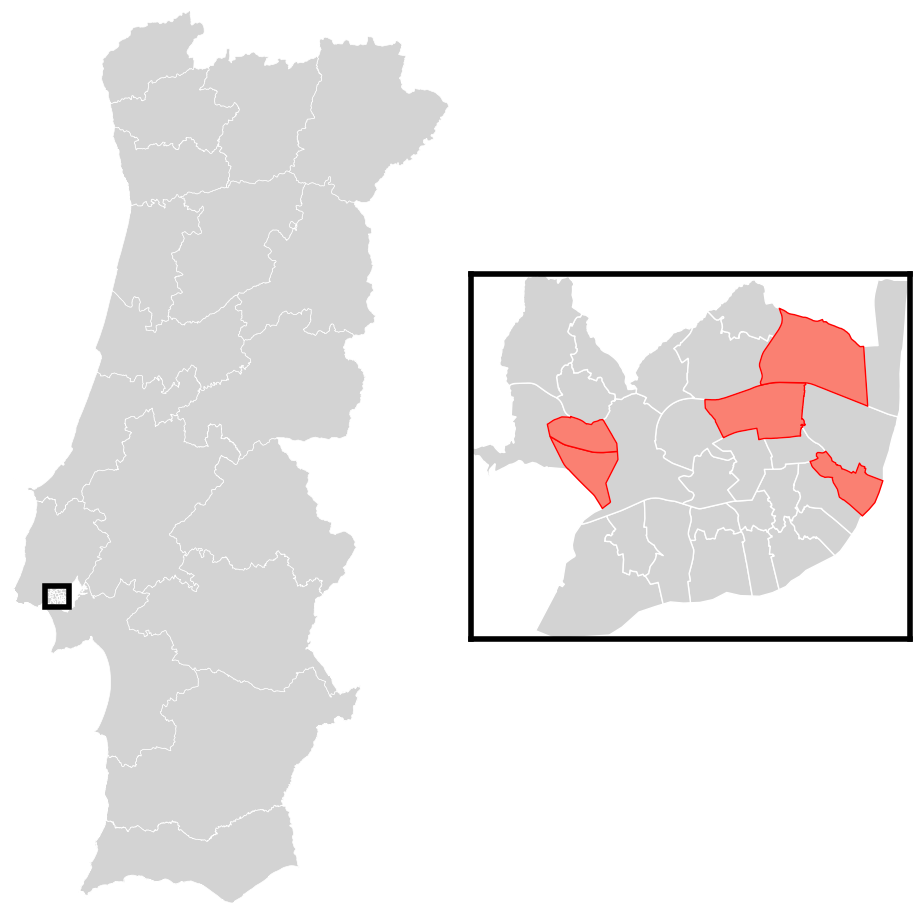

In [28]:
from matplotlib.patches import Rectangle

# Set up the figure and axes
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))

# Plot the districts with white outline and Lisbon with red border
districts.plot(ax=ax1, 
               facecolor='lightgrey', 
               edgecolor='white',
               linewidth=0.5)

# Add a rectangular patch around Lisbon with red edgecolor
ax1.add_patch(Rectangle((lisbon.total_bounds[0], lisbon.total_bounds[1]),
                         lisbon.total_bounds[2] - lisbon.total_bounds[0],
                         lisbon.total_bounds[3] - lisbon.total_bounds[1],
                         fill=False,
                         edgecolor='black',
                         linewidth=4,
                         clip_on=False))
ax1.axis('off')

# Plot Lisbon
lisbon[~mask].plot(ax=ax2, 
                   facecolor='lightgrey', 
                   edgecolor='white',
                   linewidth=1)

# Plot the selected freguesias with red border
lisbon[mask].plot(ax=ax2, 
                  facecolor='salmon', 
                  edgecolor='red',
                  linewidth=1)
# Set the axis limits
ax1.set_xlim(portugal.total_bounds[0]-2000, portugal.total_bounds[2])
ax1.set_ylim(portugal.total_bounds[1], portugal.total_bounds[3])
ax2.set_xlim(lisbon.total_bounds[0], lisbon.total_bounds[2])
ax2.set_ylim(lisbon.total_bounds[1], lisbon.total_bounds[3])

# Set the titles and axis labels
#ax1.set_title(label='Portugal', fontsize=20)
ax2.set(xticks=[], yticks=[])
#ax2.set_title(label='Lisbon Municipes', fontsize=20)

# Set the color and width of the spines
for spine in ax2.spines.values():
    spine.set_color('black')
    spine.set_linewidth(4)

# Adjust the spacing between subplots
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.5, top=0.95, wspace=0.05)

plt.savefig('cute.pdf')